# Stock Performance Analysis with Regression Based Machine Learning

In [64]:
import pandas as pd
stock_data = pd.read_csv('Desktop/umslFall2023/4200python/FinalProject/ProjectData.txt', header = None)

In [65]:
stock_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.488,0.609,0.781,0.800,0.68,0.333
1,0.0,1.0,0.0,0.0,0.0,0.0,0.505,0.508,0.444,0.414,0.56,0.667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.728,0.800,0.776,0.756,0.56,0.467
3,0.0,0.0,0.0,1.0,0.0,0.0,0.385,0.426,0.529,0.529,0.56,0.267
4,0.0,0.0,0.0,0.0,1.0,0.0,0.498,0.479,0.355,0.320,0.80,0.733


In [66]:
col_names = []
with open("Desktop/umslFall2023/4200python/FinalProject/ProjectDomain.txt", "r") as col_names_file:
    lines = col_names_file.readlines()
    for line in lines:
        col_names.append(line.split(":")[0])
print(col_names)
col_names = dict(zip(stock_data.columns, col_names))

['largeBP', 'largeROE', 'largeSP', 'largeReturnLastQuarter', 'largeMarketValue', 'smallSystematicRisk', 'annualReturn', 'excessReturn', 'systematicRisk', 'totalRisk', 'absWinRate', 'relWinRate']


In [67]:
stock_data.rename(columns=col_names, inplace=True)
stock_data.head()

,largeBP,largeROE,largeSP,largeReturnLastQuarter,largeMarketValue,smallSystematicRisk,annualReturn,excessReturn,systematicRisk,totalRisk,absWinRate,relWinRate
0,1.0,0.0,0.0,0.0,0.0,0.0,0.488,0.609,0.781,0.800,0.68,0.333
1,0.0,1.0,0.0,0.0,0.0,0.0,0.505,0.508,0.444,0.414,0.56,0.667
2,0.0,0.0,1.0,0.0,0.0,0.0,0.728,0.800,0.776,0.756,0.56,0.467
3,0.0,0.0,0.0,1.0,0.0,0.0,0.385,0.426,0.529,0.529,0.56,0.267
4,0.0,0.0,0.0,0.0,1.0,0.0,0.498,0.479,0.355,0.320,0.80,0.733


In [68]:
stock_data.shape

(315, 12)

# Exploring the Data

In [69]:
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', None)

In [70]:
stock_data.describe()

,largeBP,largeROE,largeSP,largeReturnLastQuarter,largeMarketValue,smallSystematicRisk,annualReturn,excessReturn,systematicRisk,totalRisk,absWinRate,relWinRate
count,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000,315.0000
mean,0.1666,0.1666,0.1666,0.1666,0.1666,0.1666,0.5504,0.5698,0.4276,0.4226,0.5431,0.5432
std,0.1980,0.1980,0.1980,0.1980,0.1980,0.1980,0.1440,0.1359,0.1360,0.1452,0.1357,0.1457
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000,0.2000,0.2000,0.2000,0.2000,0.2000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4695,0.4940,0.3360,0.3160,0.4570,0.4250
50%,0.1670,0.1670,0.1670,0.1670,0.1670,0.1670,0.5680,0.5830,0.4120,0.3950,0.5600,0.5330
75%,0.3330,0.3330,0.3330,0.3330,0.3330,0.3330,0.6615,0.6715,0.5010,0.5010,0.6400,0.6500
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8000,0.8000,0.8000,0.8000,0.8000,0.8000


# Visualizing the Features

In [71]:
sample_df = stock_data.sample(frac=0.1, random_state=17)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-pa

<Axes: xlabel='smallSystematicRisk', ylabel='annualReturn'>

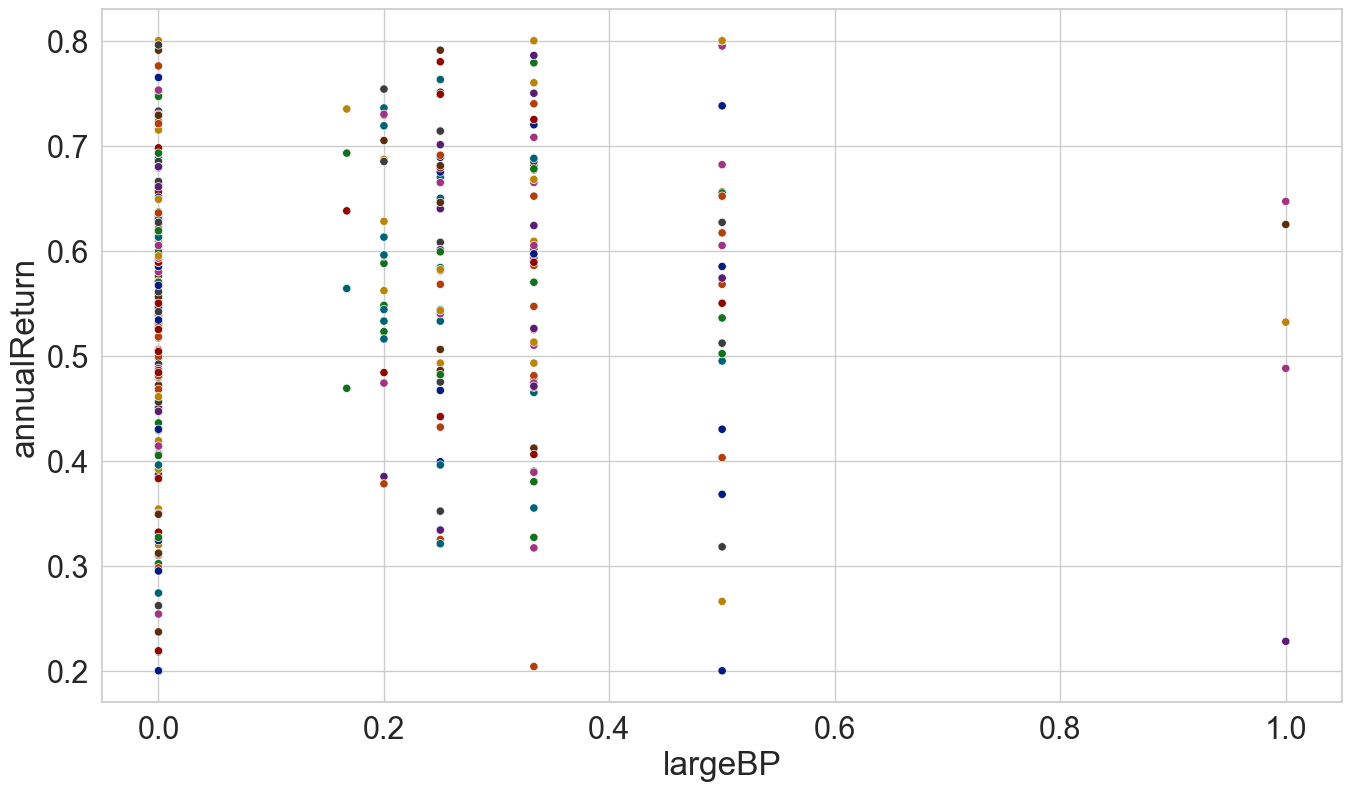

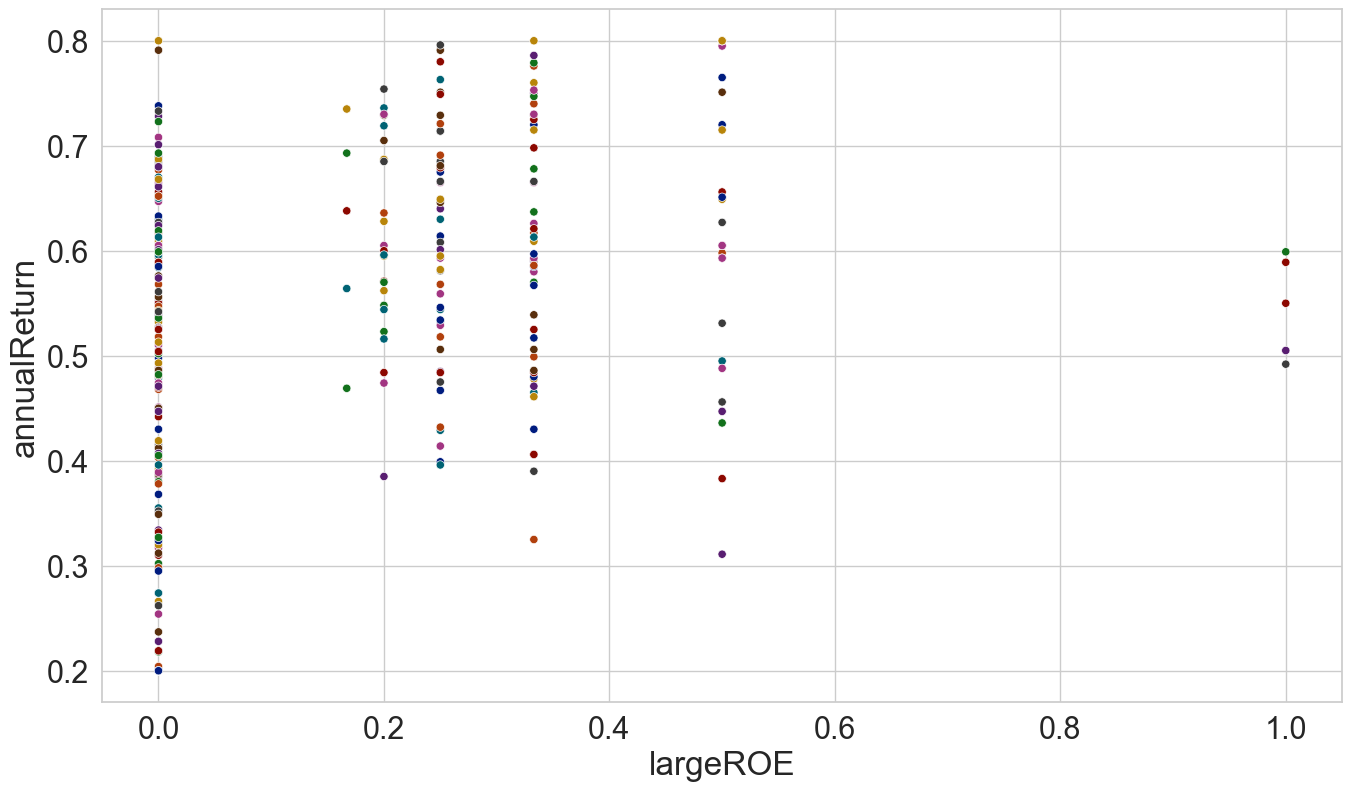

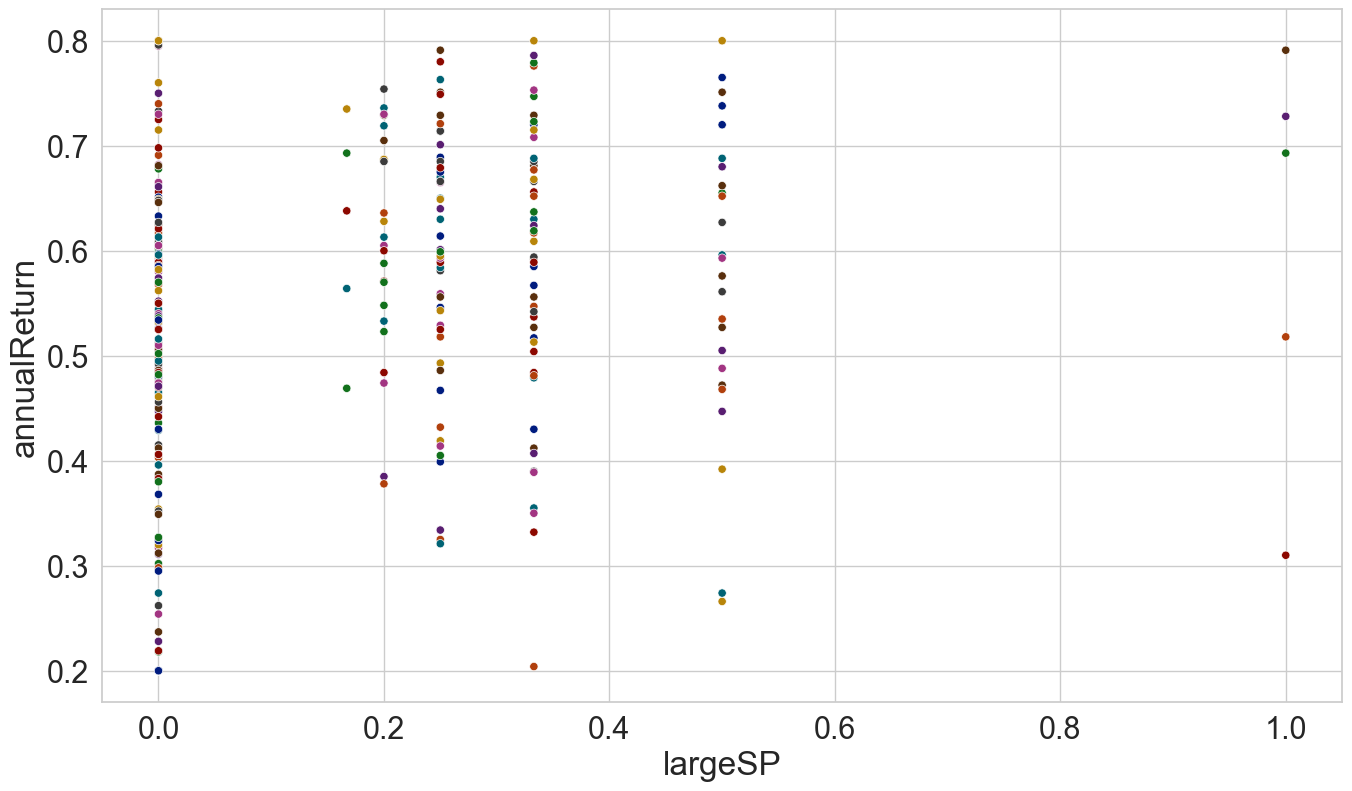

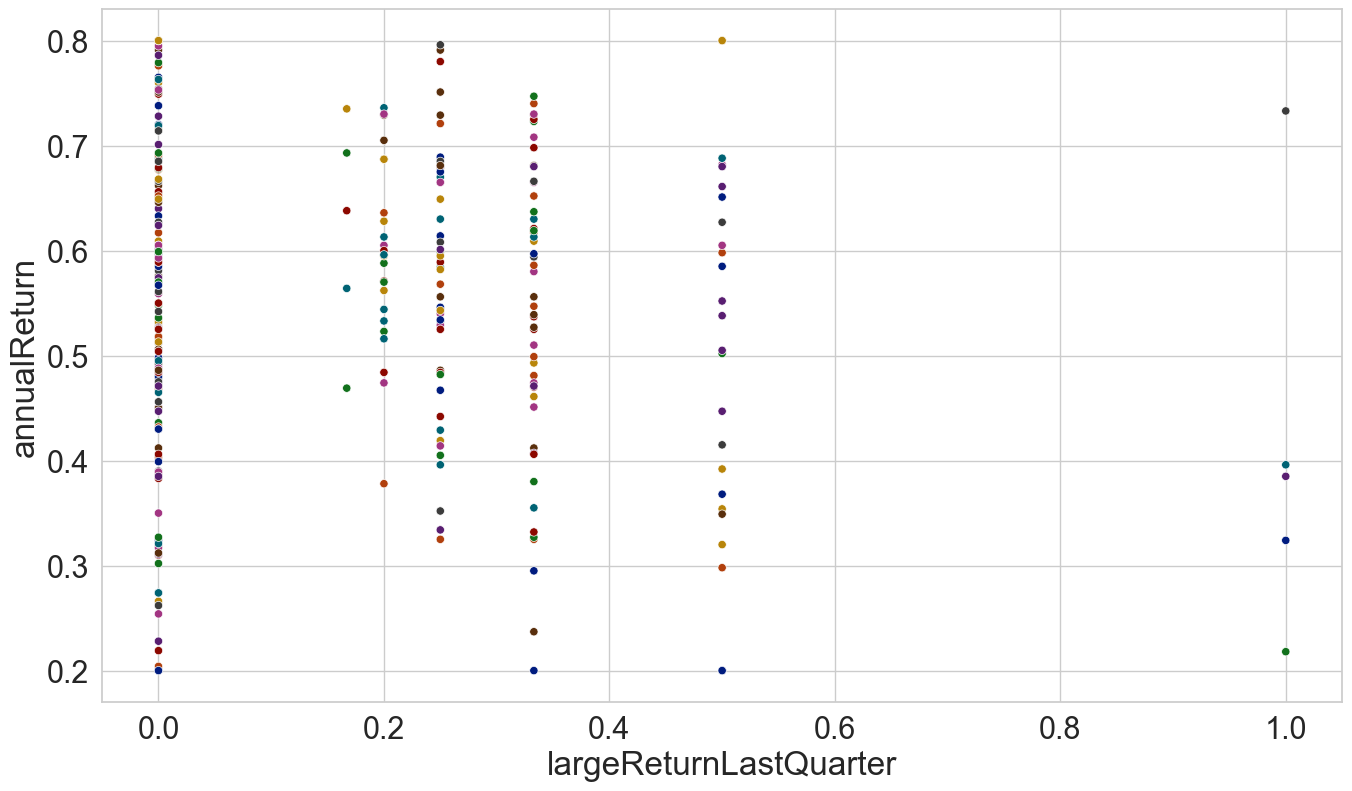

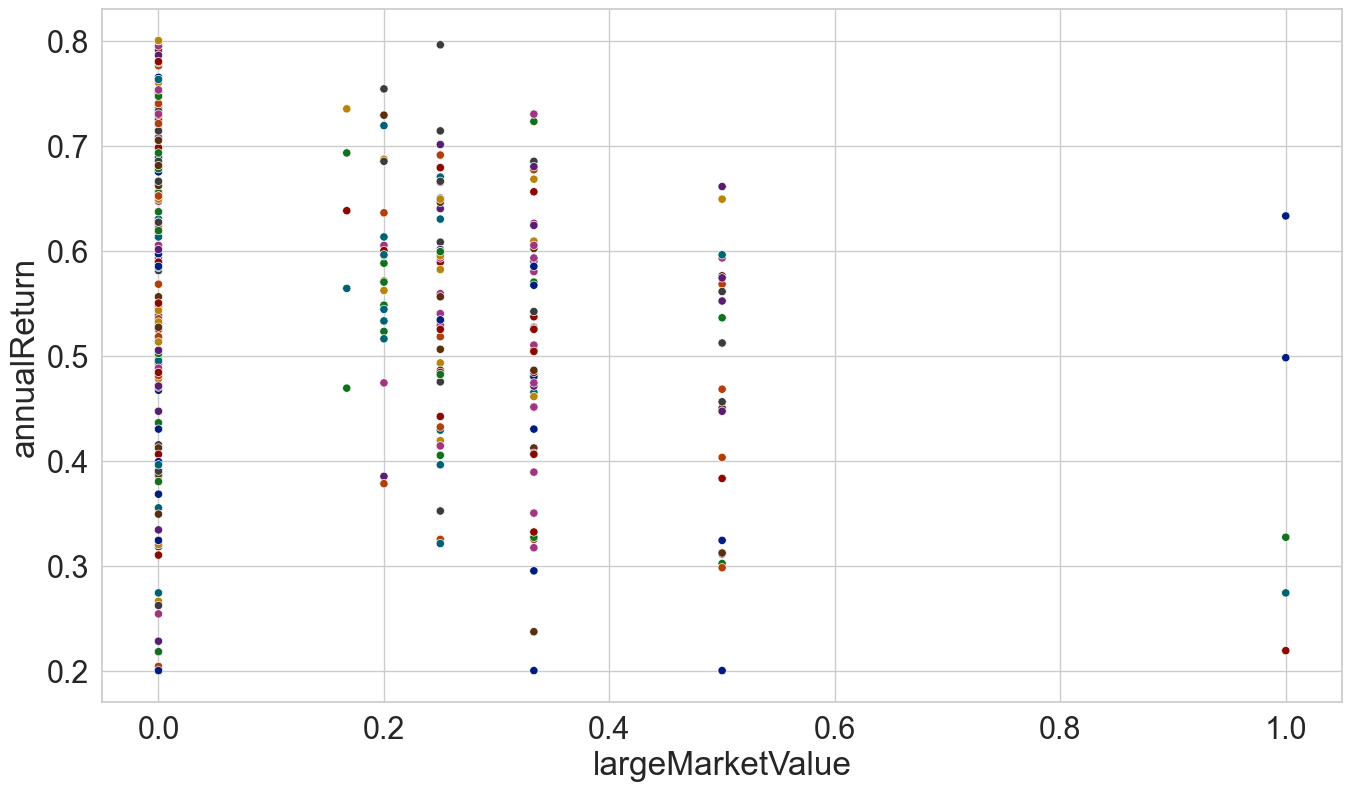

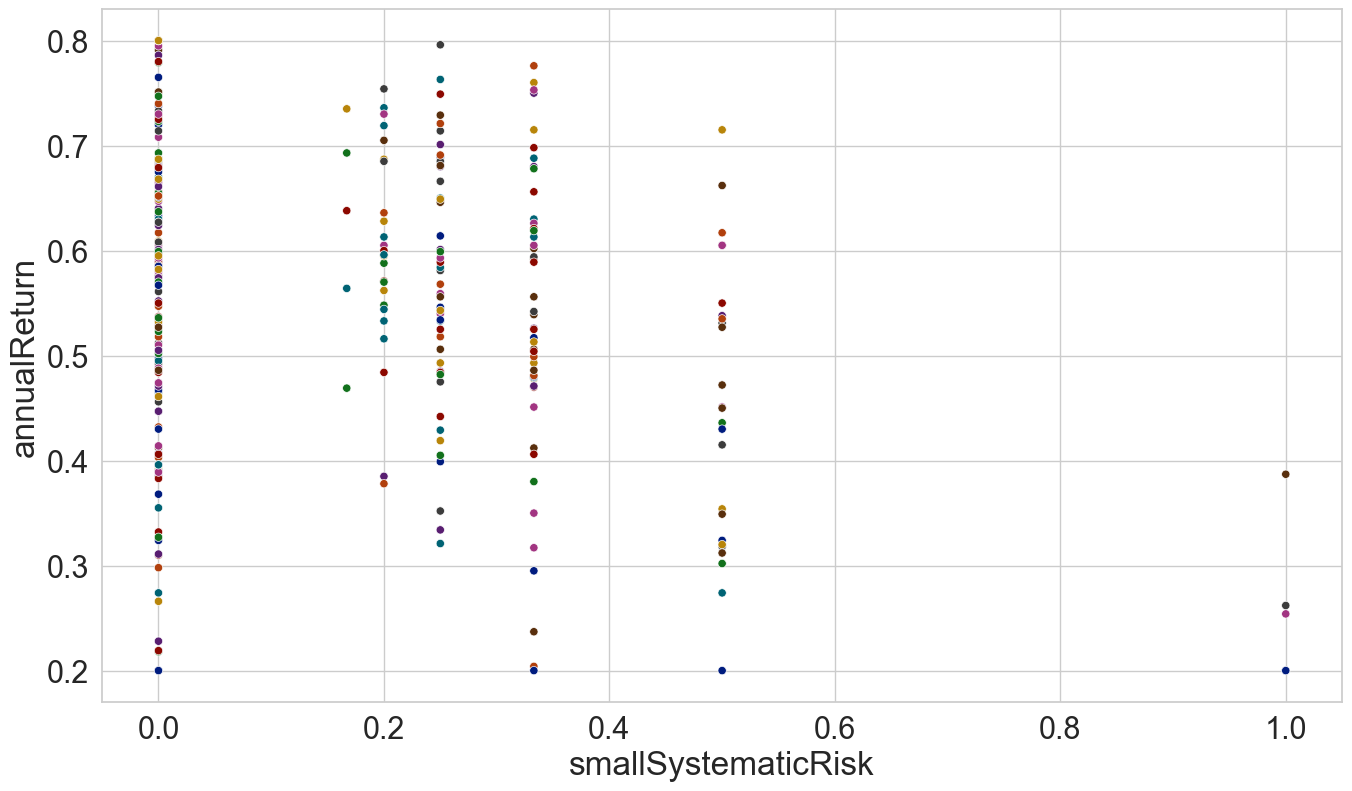

In [73]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.largeBP, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.largeROE, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.largeSP, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.largeReturnLastQuarter, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.largeMarketValue, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
plt.figure(figsize=(16,9))
sns.scatterplot(data=sample_df, x=stock_data.smallSystematicRisk, y=stock_data.annualReturn, \
                hue=stock_data.annualReturn,\
               palette='dark', legend=False)
    

# Exploring the relationship between each independent variable and the Annual Return rate of Stocks

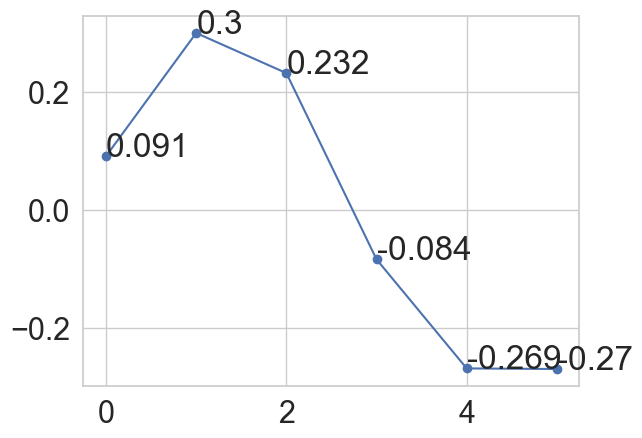

In [74]:
correlation = []
for feature in stock_data.columns[0:6]:
    correlation.append(round(stock_data.annualReturn.corr(stock_data[feature]), 3))
plt.plot(list(range(len(correlation))), correlation, marker = 'o')
for a, b in zip(list(range(len(correlation))), correlation):
    plt.text(a, b, str(b))

# Splitting the Data for Training and Testing

In [75]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(stock_data[stock_data.columns[0:6]], \
                                                    stock_data[stock_data.columns[6]], \
                                                    random_state=20, test_size = 0.20)

In [110]:
X_train.shape

(252, 6)

In [111]:
X_test.shape

(63, 6)

# Training the Model

In [112]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
sel_linear_reg = LinearRegression()

In [113]:
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [141]:
sel_columns = X_train.columns[[0, 1, 2, 3, 4]]
print(sel_columns)
sel_linear_reg.fit(X=X_train[sel_columns], y=y_train)

Index(['largeBP', 'largeROE', 'largeSP', 'largeReturnLastQuarter',
       'largeMarketValue'],
      dtype='object')


LinearRegression()

In [142]:
for i, name in enumerate(stock_data[stock_data.columns[0:6]]):
    print(f'{name:>40}: {linear_regression.coef_[i]}')

                                 largeBP: 5.003028568056713
                                largeROE: 5.112263330685
                                 largeSP: 5.0948075367070835
                  largeReturnLastQuarter: 4.904446688919359
                        largeMarketValue: 4.796311949659532
                     smallSystematicRisk: 4.7970066097192605


In [143]:
for i, name in enumerate(stock_data[sel_columns]):
    print(f'{name:>40}: {sel_linear_reg.coef_[i]}')

                                 largeBP: 0.20569301968855677
                                largeROE: 0.3156692599442584
                                 largeSP: 0.29835362685764955
                  largeReturnLastQuarter: 0.10798255149948571
                        largeMarketValue: 9.445988728473687e-05


# Testing the Model

In [144]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [145]:
predicted

array([0.60468848, 0.5503461 , 0.55062111, 0.4240893 , 0.59810998,
       0.51912214, 0.45691706, 0.66129658, 0.56212887, 0.54615582,
       0.52906979, 0.59596058, 0.59269127, 0.4240893 , 0.59810998,
       0.59245995, 0.54598216, 0.54615582, 0.65397942, 0.55051977,
       0.55754687, 0.47153192, 0.49269461, 0.59936204, 0.54643083,
       0.52906979, 0.66129658, 0.55608477, 0.39299275, 0.39334008,
       0.49447667, 0.39334008, 0.57864402, 0.50078016, 0.5500711 ,
       0.52325701, 0.55701707, 0.59936204, 0.53730069, 0.52325701,
       0.59209364, 0.59936204, 0.49329224, 0.6998689 , 0.62846882,
       0.54643083, 0.54598216, 0.47153192, 0.48747946, 0.57329085,
       0.57346451, 0.39264542, 0.6998689 , 0.57346451, 0.51912214,
       0.39299275, 0.59936204, 0.49292593, 0.64525152, 0.5189449 ,
       0.55051977, 0.49635106, 0.52325701])

In [146]:
expected

199    0.651
169    0.608
13     0.593
166    0.680
109    0.763
       ...  
7      0.655
122    0.595
47     0.544
16     0.318
93     0.537
Name: annualReturn, Length: 63, dtype: float64

In [147]:
predicted_sel = sel_linear_reg.predict(X_test[sel_columns])
predicted_sel

array([0.60345976, 0.54899368, 0.54951572, 0.4276235 , 0.59656283,
       0.51766913, 0.46016109, 0.66459926, 0.5652475 , 0.54464116,
       0.53274137, 0.59480195, 0.59610348, 0.4276235 , 0.59656283,
       0.59613493, 0.54466477, 0.54464116, 0.652315  , 0.54897007,
       0.54657528, 0.47007637, 0.49611928, 0.59732688, 0.5451632 ,
       0.53274137, 0.66459926, 0.55951285, 0.39168109, 0.39163386,
       0.49324152, 0.39163386, 0.57717355, 0.49961641, 0.54847164,
       0.52697526, 0.55559593, 0.59732688, 0.53605384, 0.52697526,
       0.59543958, 0.59732688, 0.49678318, 0.6986453 , 0.63206167,
       0.5451632 , 0.54466477, 0.47007637, 0.49101707, 0.57215883,
       0.57213522, 0.39172832, 0.6986453 , 0.57213522, 0.51766913,
       0.39168109, 0.59732688, 0.49608782, 0.64365718, 0.51752172,
       0.54897007, 0.49448037, 0.52697526])

# Visualizing the Expected vs Predicted Stock Performance

In [148]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
df['Sel_Predicted'] = pd.Series(predicted_sel)

(0.2, 0.8)

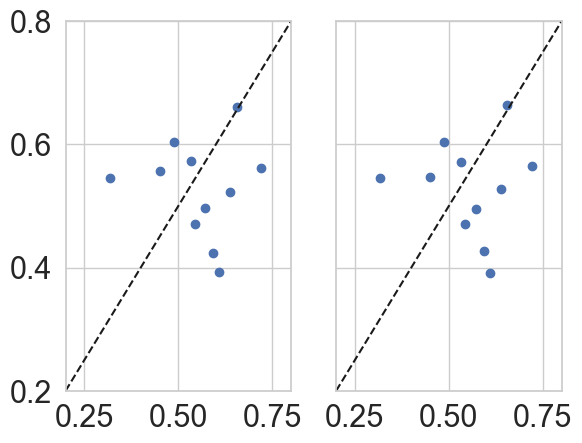

In [149]:
figure, (ax1, ax2) = plt.subplots(1, 2, sharex =False, sharey=True)
ax1.plot(df['Expected'], df['Predicted'], marker='o', linestyle='None')
ax2.plot(df['Expected'], df['Sel_Predicted'], marker='o',linestyle='None')
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
ax1.plot([start, end], [start, end], 'k--')
ax1.set_xlim(start, end)
ax1.set_ylim(start, end)
start_sel = min(expected.min(), predicted_sel.min())
end_sel = max(expected.max(), predicted_sel.max())
ax2.plot([start_sel, end_sel], [start_sel, end_sel], 'k--')
ax2.set_xlim(start, end)
ax2.set_ylim(start, end)

# Regression Model Metrics

In [150]:
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.33553949095470437

In [151]:
metrics.mean_squared_error(expected, predicted)

0.015050850181841753

In [152]:
metrics.r2_score(expected, predicted_sel)

0.3364812457392631

In [153]:
metrics.mean_squared_error(expected, predicted)

0.015050850181841753

# Choosing the best model

In [154]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score
estimators = {
    'LinearRegression': linear_regression,
    'Selective': sel_linear_reg,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [155]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=2, random_state=20, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,\
                            X=stock_data[stock_data.columns[0:6]],\
                            y=stock_data[stock_data.columns[6]], cv=kfold,\
                            scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.237
       Selective: mean of r2 scores=0.237
      ElasticNet: mean of r2 scores=-0.001
           Lasso: mean of r2 scores=-0.001
           Ridge: mean of r2 scores=0.238
